# Introduction to complex networks theory
## Lesson 6: Connectedness & motifs in networks

In this notebook we continue exploring how to measure networks with the [networkx](https://networkx.org/) library, focusing on:
- network connectedness
- motifs

In [54]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

For the few examples and exerciese below, let's import one directed network that we will use for all examples. We import the network on friendships in a [higschool](https://networks.skewed.de/net/highschool). Data is collected through surveys of (male) students in a school in Illinois in 1950s. The direction of links thells us if student i named student j as a friend. (The data is gathered via two surveys separated by a few months thus the weight corresponds to repetition of friendship naming, but we will not use weights in this example.)

In [2]:
edges = pd.read_csv('../data/highschool/edges.csv')
edges.head(2)

,# source,target,weight
0,0,1,1
1,0,2,2


Let's first load the dataset in the form of directed network:

In [3]:
D_hs_friends = nx.from_pandas_edgelist(edges, 
                                     source = '# source', 
                                     target = ' target', 
                                     create_using =nx.DiGraph)

We can check if the network is loaded correctly as direct network:

In [4]:
D_hs_friends.is_directed()

True

Let's also see the number of nodes and edges the loaded network has:

In [5]:
D_hs_friends.number_of_nodes(), D_hs_friends.number_of_edges()

(70, 366)

From this directed network, we will also create one undirected network for investigation and demonstration of functions below. We choose to keep only the links where both students declared their friendship. We do that using argument 'reciprocal' when using the function 'to_undirected':

In [6]:
G_hs_friends = D_hs_friends.to_undirected(reciprocal=True)
G_hs_friends.is_directed()

False

In [7]:
G_hs_friends.number_of_nodes(), G_hs_friends.number_of_edges()

(70, 92)

Focusing only on reciprocated friendship, we see that the number of links is much smaller. How many links do you think this network could have had if all the links printed above were reciprocal?

### Link density
We can use function `density` to measure how many links there are compared to the maximal number of links there could have been:

In [8]:
nx.density(G_hs_friends)

0.0380952380952381

In [9]:
# how would you calculate this to check if the result is correct?

n = G_hs_friends.number_of_nodes()
l = G_hs_friends.number_of_edges()

2*l/(n*(n-1))

0.0380952380952381

In [11]:
nx.density(D_hs_friends)

0.07577639751552795

In [12]:
# how would you calculate this to check if the result is correct?


We see that the undirected network we have created is more sparsely connected than its original directed network. That is probably due to the fact that we have chosen to study as links only the cases when both students identified their friendship. How else could you define an undirected network from previous network? Calculate its density and compare with the directed network, is that one more or less dense?

### Subgraphs

For any choice of nodes, we can extract only the links that are between the chosen nodes and in that way construct a subgraph. Below are two subgraphs constructed using the same 3 nodes from our directed and undirected graph:

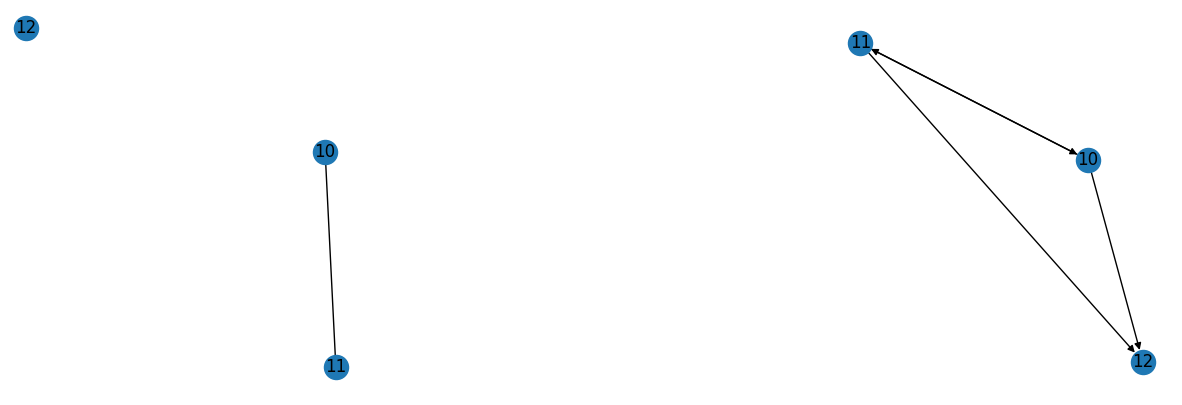

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
nx.draw(G_hs_friends.subgraph([10,11,12]), with_labels=True)

plt.subplot(1,3,3)
nx.draw(D_hs_friends.subgraph([10,11,12]), with_labels=True)

### Connectedness

When we investigate the network becase we care if some information would have spread among all nodes, one key question is whether the network is connected or not. For simple networks we can investigate that visually, but for larger networks, different layouts might hide that information and we do not want to rely on visual inspection. 
There's a function telling us if the networks is connected:

In [14]:
nx.is_connected(G_hs_friends)

False

For directed network, we distinguish two types of connectedness:
- we can check if network is weakly connected (its underlying network is connected)

In [15]:
nx.is_weakly_connected(D_hs_friends)

True

- we can check if the network is stronly connected (between any two nodes, there is a directed path)

In [16]:
nx.is_strongly_connected(D_hs_friends)

False

Example nodes where path exist among ones but not among the others:

In [17]:
nx.has_path(D_hs_friends, 9, 0)

True

In [18]:
nx.has_path(D_hs_friends, 0, 9)

False

#### Number of components
When we deal with disconnected networks, we might be interested in knowing how many connected components there are, and also which nodes belong to which component.

For the number:

In [19]:
nx.number_strongly_connected_components(D_hs_friends)

4

While different connected components we get using function `strongly_connected_components`:

In [20]:
components = list(nx.strongly_connected_components(D_hs_friends))

Elements of components list are sets of nodes that contain nodes belonging to the components:

In [21]:
#check conntent of any of the commponents

We can inspect size of each of the components:

In [22]:
[len(c) for c in components]

[67, 1, 1, 1]

We see that among 4 components, only one is nontrivial, e.g. has more than 1 node in it.

Check how the situation looks like for the undirected network - how many components and of which size there are in `G_hs_friends` network?

In [23]:
# space for your code here

#number_connected_components = 

#print(number_connected_components)

#sizes_of_connected_components = 

# print(sizes_of_connected_components)

#### Largest connected component

Among connected components we have found, we want to select the largets one, we do that in the following way:

In [24]:
lcc_nodes = max(nx.connected_components(G_hs_friends), key=len)

In [25]:
# alternative way to get this

# what's the type of lcc_nodes?

To get the largest connected component as a network, not just a list of nodes, we will use `subgraph` function to get all the links from G that are links between nodes we have selected:

In [26]:
lcc = G_hs_friends.subgraph(lcc_nodes)

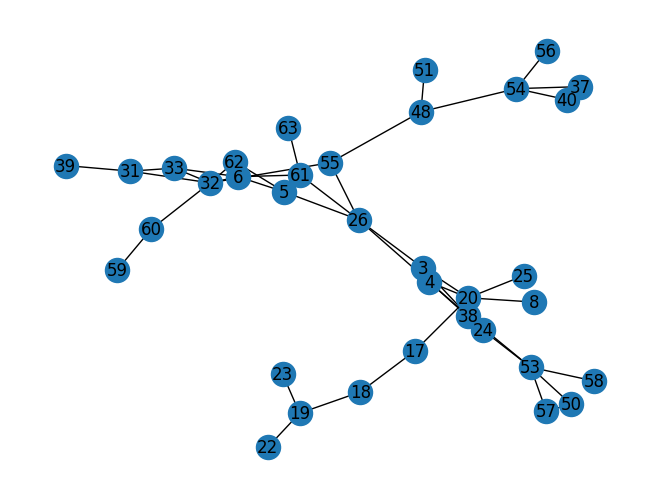

In [28]:
# drawing
np.random.seed(77)
nx.draw_spring(lcc, with_labels=True)

Let's just compare the drawing of lcc with the full network. Without going into many details, in these figures we see that we focused on the connected part, while the full network contains many different components:

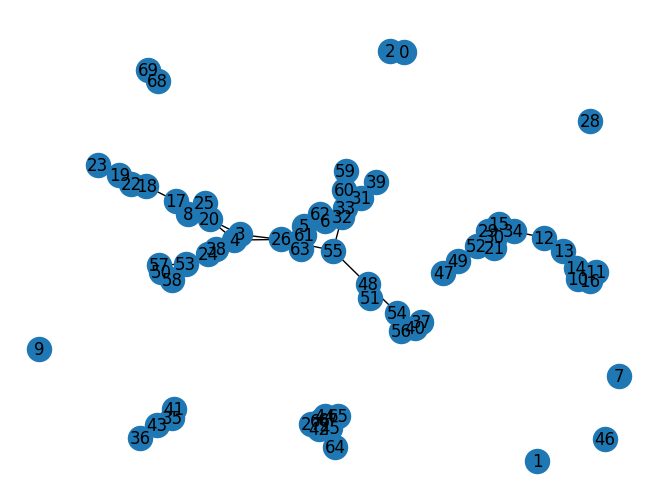

In [29]:
np.random.seed(77)
nx.draw_spring(G_hs_friends, with_labels=True)

To see how drawings could be misleading, try drawing figure above using diferent layouts and changing seed (that controls reproducibility of randomnes in figure).

##### Compare connected components based on their density or average degree

### Mofits 

#### Reciprocity
https://networkx.org/documentation/stable/reference/algorithms/reciprocity.html

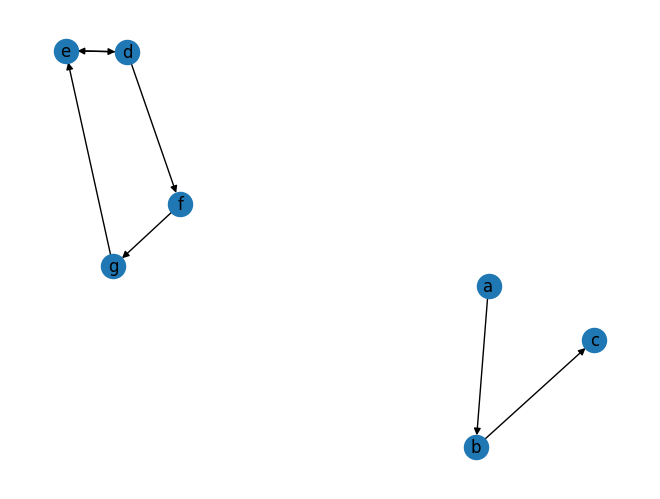

In [30]:
D_small = nx.DiGraph()
D_small.add_edges_from([('a','b'),('b','c'),('d','e'),('e','d'),('d','f'),('f','g'),('g','e')])
nx.draw(D_small,with_labels=True)

In [32]:
nx.reciprocity(D_small)

0.2857142857142857

In [33]:
# space for your calculation

In [34]:
nx.reciprocity(D_small,D_small.nodes)

{'a': 0.0,
 'b': 0.0,
 'c': 0.0,
 'd': 0.6666666666666666,
 'e': 0.6666666666666666,
 'f': 0.0,
 'g': 0.0}

In [35]:
nx.overall_reciprocity(D_hs_friends)

0.5027322404371585

How do you interpret this together with the information about the number of links we have gotten when creating undirected network?

Let's also investigate reciprocity of individual nodes, for example:

In [36]:
nx.reciprocity(D_hs_friends,[0,1])

{0: 0.25, 1: 0.0}

We can check these results by comparing predacessors and successors of these nodes:

In [37]:
list(D_hs_friends.successors(1)),list(D_hs_friends.predecessors(1))

([18, 3, 4], [0, 22])

In [38]:
list(D_hs_friends.successors(0)),list(D_hs_friends.predecessors(0))

([1, 2, 3, 4, 5, 6], [2, 19])

#### Clustering coeficinet

Local [clustering coefficient](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering) - tells us something about local density. If we focus on a single node, local clustering coefficient counts number of triangles, divided by total number of triangles.

In [39]:
# lets create also a second connected component from our undirected network:
second_component = G_hs_friends.subgraph(list(nx.connected_components(G_hs_friends))[6])

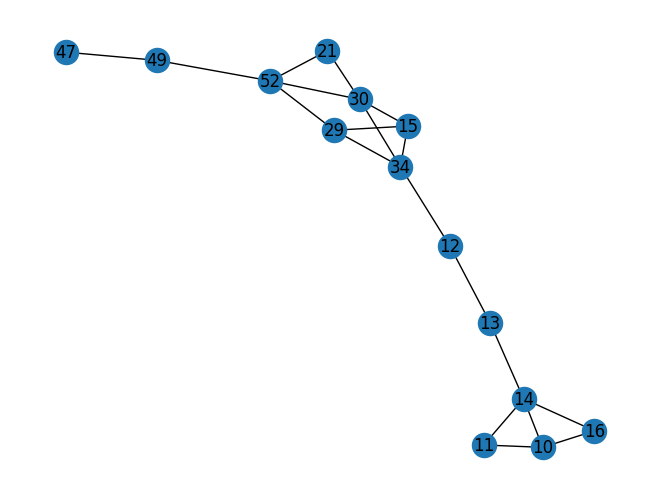

In [40]:
nx.draw(second_component,with_labels=True)

We created this component because it is smaller and we might easily check and count our understaning of clustering. Choosing one node, we can calculate its clustering coefficent, her for example node 14:

In [41]:
nx.clustering(second_component,14)

0.3333333333333333

Looking at the graph, what do you think the clustering of node 14 is?

In [42]:
#

We also usually report average clustering coefficient within a network, let's see it here

In [43]:
nx.average_clustering(second_component)

0.41666666666666663

This we can also calculate directly using clustering calculations for all nodes individually

In [44]:
np.mean(list(nx.clustering(second_component).values()))

0.41666666666666663

The global clustering cofficient is also implemented in networkx under the name transitivity:

In [45]:
# global clustering coeficinet
nx.transitivity(second_component)

0.38461538461538464

As with the degree, the mean clustering might not be enough, so we often calculate clustering coefficient for all the nodes in the network and then inspect that distribution.

Calculate clustering for all nodes of G_hs_friends network and draw its distribution, what do you notice:

In [46]:
##

In [47]:
##

#### Would you expect nodes with higher degree to have higher or lower clustering coefficient?

In [48]:
G2 = D_hs_friends.to_undirected()

cluster = nx.clustering(G2)
cluster_df = pd.DataFrame(columns=['nodes','clustering_coef'])
cluster_df['nodes'] = cluster.keys()
cluster_df['clustering_coef'] = cluster.values()

In [49]:
degree_df = pd.DataFrame.from_dict(nx.degree(G2)).rename(columns = {0:'nodes',1:'degree'})

In [50]:
joined_df = pd.merge(cluster_df,degree_df,on='nodes')

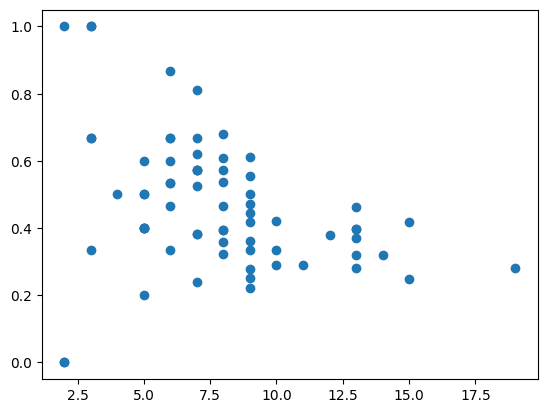

In [51]:
plt.scatter(joined_df['degree'],joined_df['clustering_coef'])

In [52]:
joined_df['degree'].corr(joined_df['clustering_coef'])

-0.3410083253414744

<AxesSubplot: xlabel='degree', ylabel='clustering_coef'>

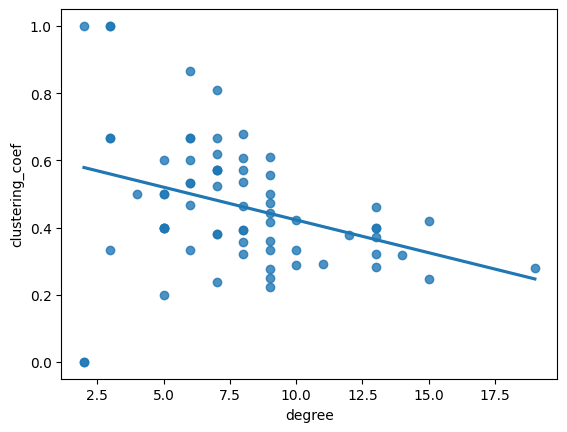

In [55]:
sns.regplot(joined_df,x='degree',y='clustering_coef',ci=False)

#### Triads in directed networks:

In [56]:
nx.triadic_census(D_hs_friends)

{'003': 38079,
 '012': 9822,
 '102': 5175,
 '021D': 166,
 '021U': 281,
 '021C': 275,
 '111D': 368,
 '111U': 206,
 '030T': 66,
 '030C': 4,
 '201': 61,
 '120D': 70,
 '120U': 34,
 '120C': 26,
 '210': 66,
 '300': 41}

Here we can see what is hidden behind these cypher triad names:

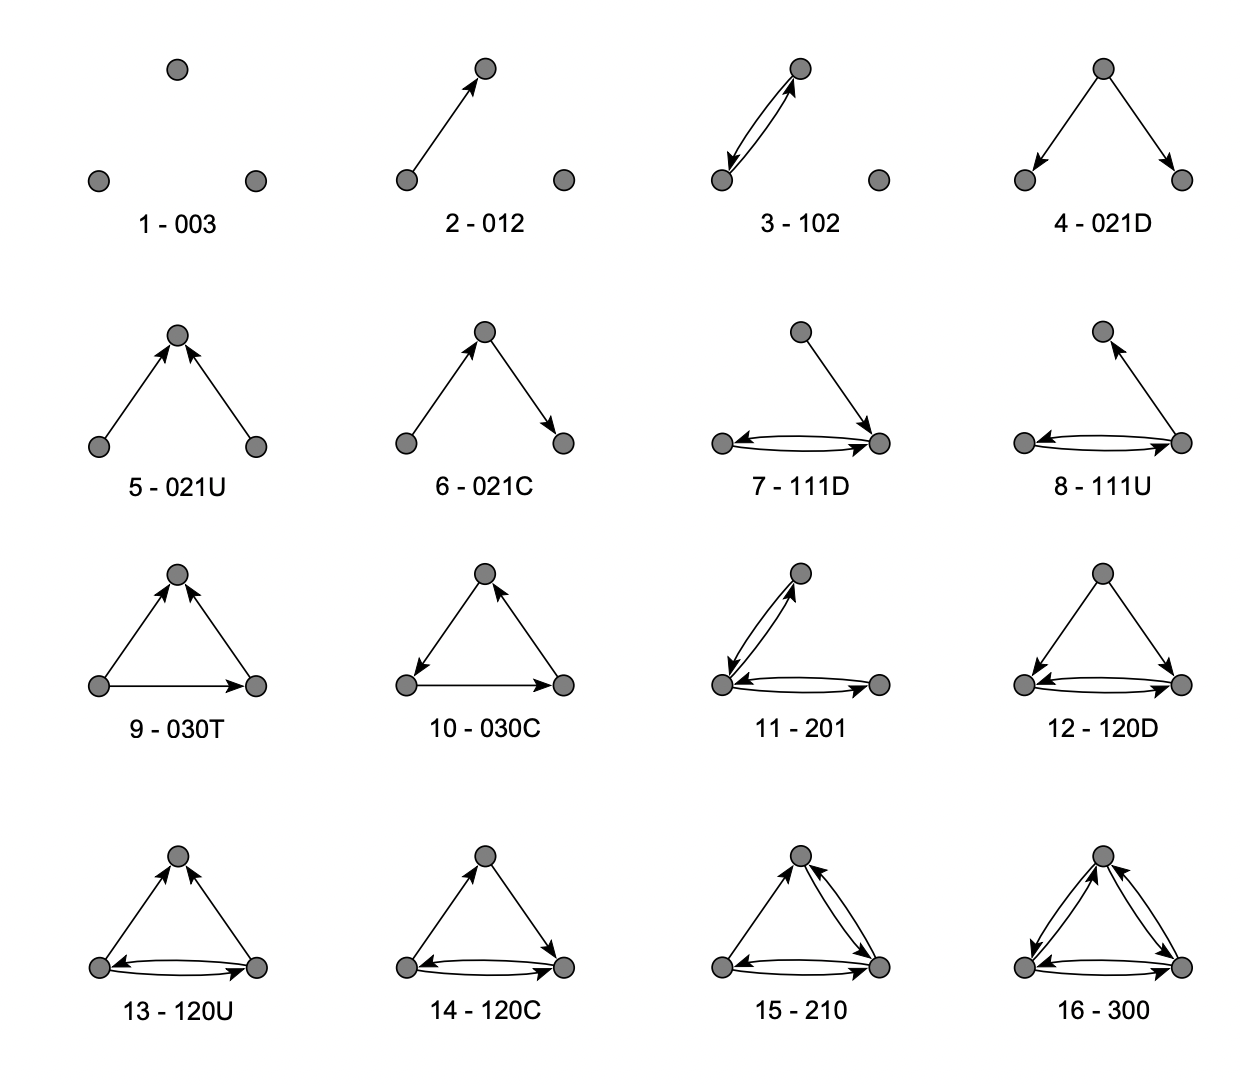

Figure from this [reference](http://vlado.fmf.uni-lj.si/pub/networks/doc/triads/triads.pdf) based on which the function is implemented.

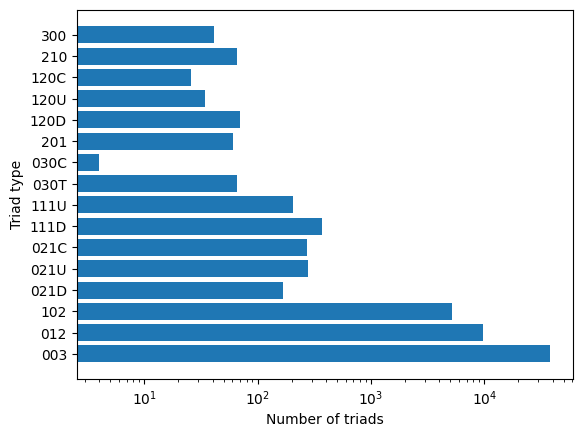

In [57]:
triad_count = nx.triadic_census(D_hs_friends)
plt.barh(list(triad_count.keys()),triad_count.values())
plt.xscale('log')
plt.xlabel('Number of triads')
plt.ylabel('Triad type')
plt.show()

#### Cliques
Beside triangles, that are a simple fully connected graph with three nodes, we can search for all other cliques within the graph.

We can list them all, or search maximal size clique and identify the nodes in it:

In [61]:
list(nx.find_cliques(G_hs_friends)) 

[[0, 2],
 [1],
 [3, 4, 26],
 [3, 4, 20],
 [3, 4, 38],
 [4, 24, 38],
 [5, 61, 26],
 [5, 61, 6],
 [5, 62, 6],
 [6, 32, 33],
 [6, 32, 62],
 [7],
 [8, 20],
 [9],
 [10, 14, 16],
 [10, 14, 11],
 [12, 34],
 [12, 13],
 [13, 14],
 [15, 34, 29],
 [15, 34, 30],
 [17, 18],
 [17, 20],
 [18, 19],
 [19, 22],
 [19, 23],
 [20, 25],
 [21, 52, 30],
 [24, 53, 38],
 [26, 55],
 [28],
 [29, 52],
 [31, 32, 33],
 [31, 39],
 [32, 60],
 [32, 55],
 [35, 41, 43],
 [36, 43],
 [37, 40, 54],
 [45, 64],
 [45, 66, 67, 65, 44],
 [45, 66, 67, 42, 27],
 [45, 66, 67, 42, 44],
 [46],
 [47, 49],
 [48, 51],
 [48, 54],
 [48, 55],
 [49, 52],
 [50, 57, 53],
 [53, 58],
 [54, 56],
 [59, 60],
 [61, 63],
 [68, 69]]

In [62]:
max_clique_nodes = max(nx.find_cliques(G_hs_friends), key=len)

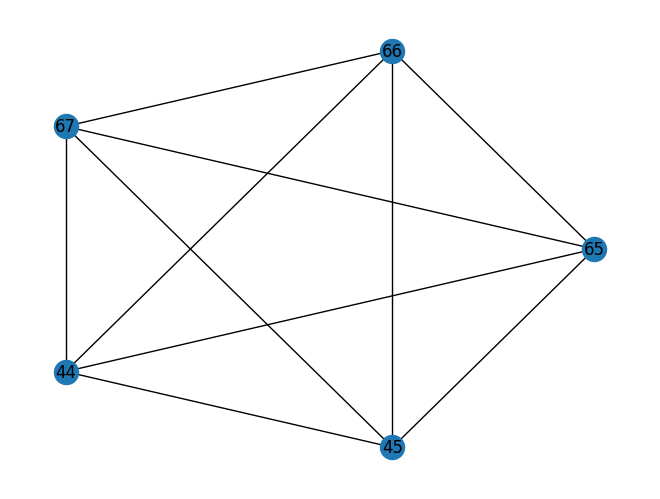

In [64]:
nx.draw_circular(G_hs_friends.subgraph(max_clique_nodes),with_labels=True)

Here you can find more [clique functions](https://networkx.org/documentation/stable/reference/algorithms/clique.html) that can be of use if you are counting cliques, finding maximal cliques directly, etc.

### Degree assortativity

In [65]:
nx.degree_assortativity_coefficient(G2)

0.0829577275592345